In [1]:
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numpy import random
import numpy as np
import sqlite3

In [2]:
conn = sqlite3.connect('../data/c4_sample.db')
c = conn.cursor()

In [3]:
rows = c.execute('SELECT google_classifier, n_tokens FROM c4_sample WHERE google_classifier IS NOT NULL').fetchall()

In [4]:
def sort_dict(dic):
    return {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

In [5]:
cat_count = defaultdict(int)
supercat_count = defaultdict(int)
supercat_tokens = defaultdict(list)
for row in rows:
    classification = ast.literal_eval(row[0]) # read string of dict as python dict
    
    # Couldn't be classified -> skip
    if len(classification) == 0:
        cat_count['Failed'] += 1
        supercat_count['Failed'] += 1
        supercat_tokens['Failed'].append(row[1])
        continue

    # Category with highest probability
    row_cat = next(iter(sort_dict(classification)))
    row_supercat = [subcat for subcat in row_cat.split('/') if subcat][0]

    # count occurances
    cat_count[row_cat] += 1
    supercat_count[row_supercat] += 1

    supercat_tokens[row_supercat].append(row[1])

##### subcategory plot

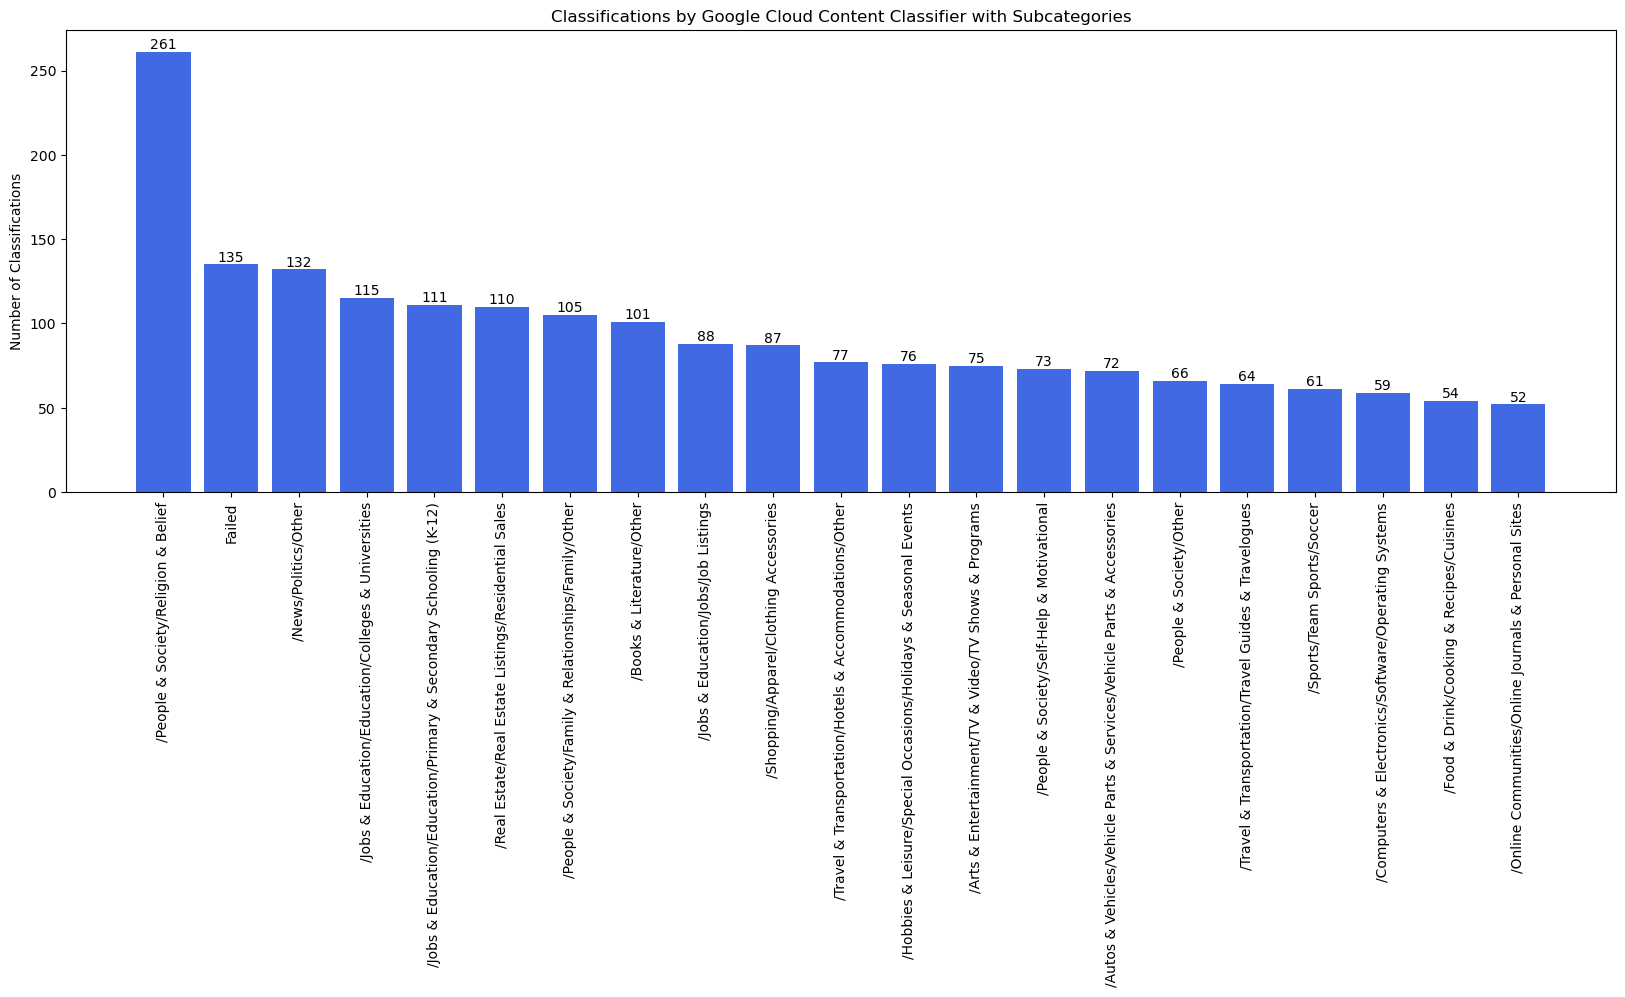

In [7]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90)
xlocs, xlabs = plt.xticks()
for i, (category, amount) in enumerate(sort_dict(cat_count).items()):
    ax.bar(category, amount, label=category, color='royalblue')
    ax.bar_label(ax.containers[i], label_type='edge')
    if i == 20: break

ax.set_ylabel("Number of Classifications")
plt.title("Classifications by Google Cloud Content Classifier with Subcategories")
plt.show()

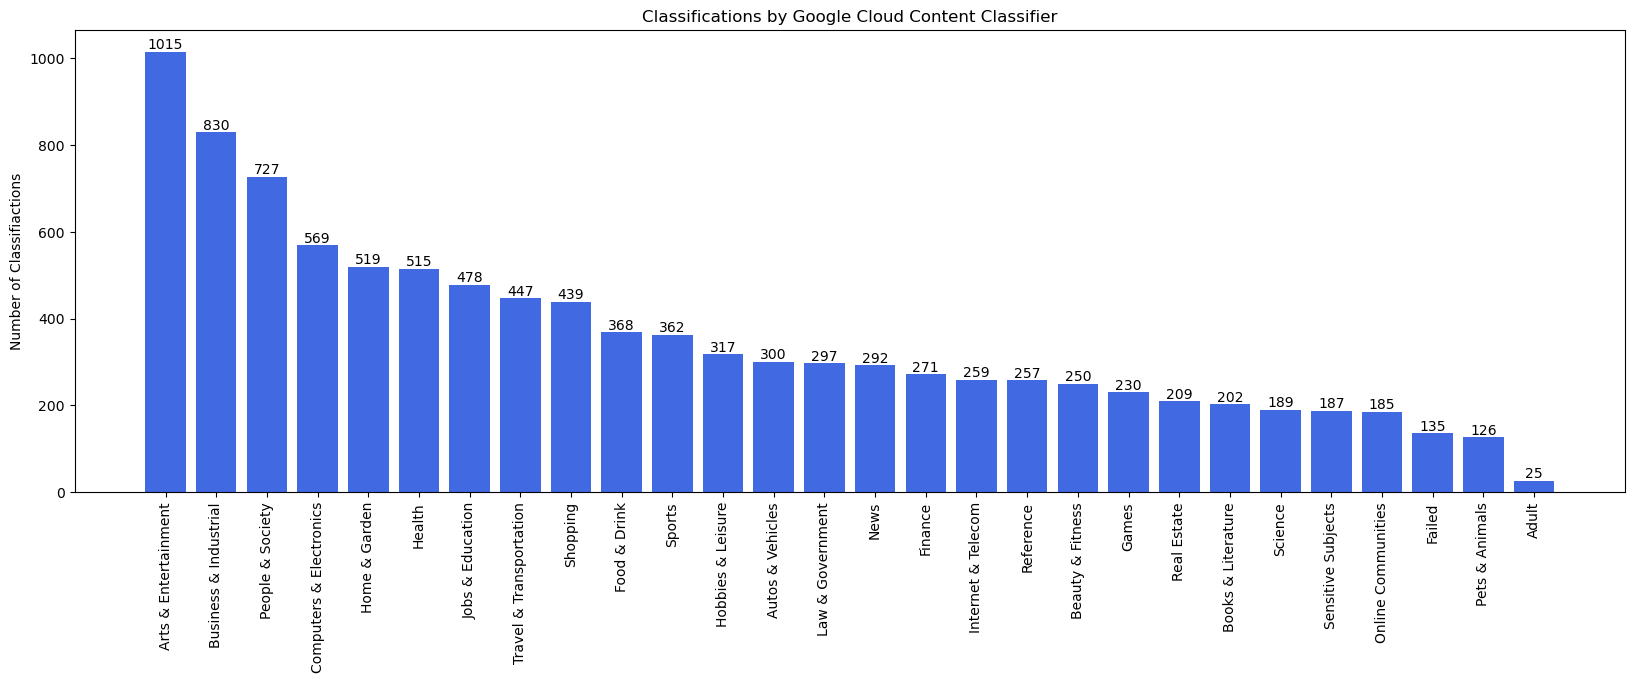

In [8]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90)
xlocs, xlabs = plt.xticks()
for i, (category, amount) in enumerate(sort_dict(supercat_count).items()):
    ax.bar(category, amount, label=category, color='royalblue')
    ax.bar_label(ax.containers[i], label_type='edge')

ax.set_ylabel("Number of Classifiactions")
plt.title("Classifications by Google Cloud Content Classifier")
plt.savefig('no_classifications.png')
plt.show()

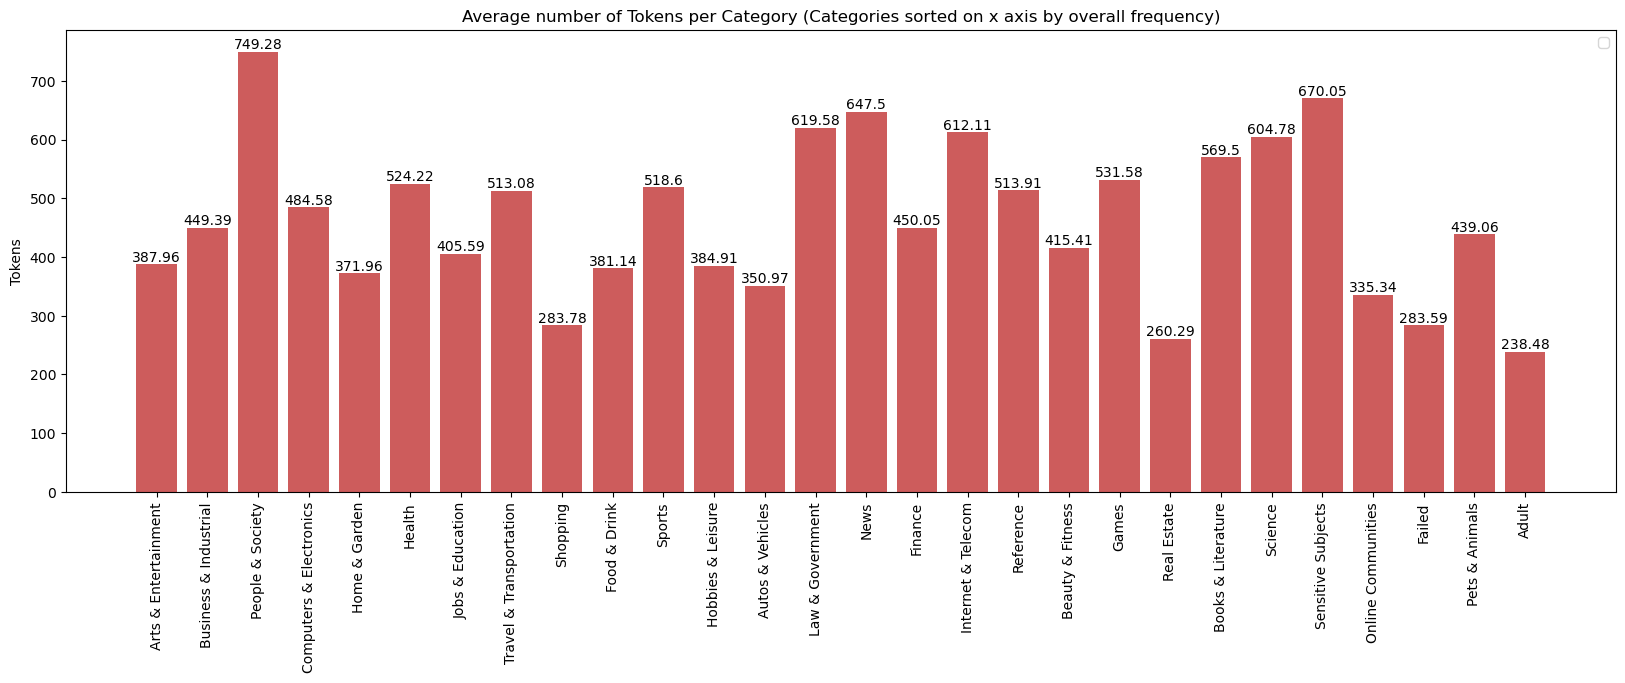

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90)
xlocs, xlabs = plt.xticks()
for i, (category, amount) in enumerate(sort_dict(supercat_count).items()):    
    ax.bar(category, round(np.mean(supercat_tokens[category]),2), color='indianred')
    ax.bar_label(ax.containers[i], label_type='edge')

handles, labels = ax.get_legend_handles_labels()
#handles.append(mpatches.Patch(color='none', label=f"Overall mean: {tokens_mean}"))
plt.title("Average number of Tokens per Category (Categories sorted on x axis by overall frequency)")
ax.legend(handles=handles)
ax.set_ylabel("Tokens")
plt.show()

In [11]:
tokens = [item for sublist in [v for k, v in supercat_tokens.items()] for item in sublist]

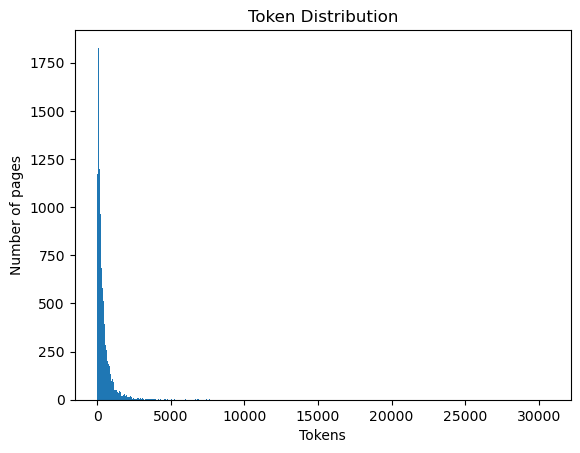

In [12]:
plt.hist(sorted(tokens), bins=500)
plt.title("Token Distribution")
plt.ylabel("Number of pages")
plt.xlabel("Tokens");

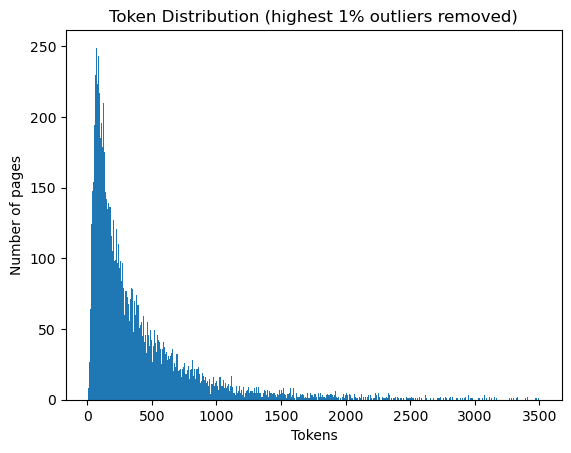

In [13]:
plt.hist(sorted(tokens)[:-100], bins=500)
plt.title("Token Distribution (highest 1% outliers removed)")
plt.ylabel("Number of pages")
plt.xlabel("Tokens");